(ttest-exercises-notebook)=
# Esercizi sul t di Student

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import pymc as pm
from pymc import HalfNormal, Model, Normal, sample
import xarray as xr
import arviz as az

import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

# check pymc version
print(f"Running on PyMC v{pm.__version__}")


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.3.0


In [2]:
# Initialize random number generator
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

sns.set_theme(palette="colorblind")

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = "svg"

Prendiamo in considerazione l'esercizio seguente. È stato condotto uno studio di ricerca al fine di esaminare le differenze tra gli adulti anziani e quelli giovani sulla percezione della soddisfazione nella vita. Per testare questa ipotesi, è stato effettuato uno studio pilota su dati ipotetici. Il test è stato somministrato a dieci adulti anziani (oltre i 70 anni) e dieci adulti giovani (tra i 20 e i 30 anni). La scala di valutazione utilizzata ha un range di punteggi da 0 a 60, dove punteggi elevati indicano una maggiore soddisfazione nella vita e punteggi bassi indicano una minore soddisfazione. È stata scelta una scala con elevata affidabilità e validità. I dati (fittizi) raccolti sono riportati di seguito.

In [3]:
younger = np.array([45, 38, 52, 48, 25, 39, 51, 46, 55, 46])
older = np.array([34, 33, 36, 38, 37, 40, 42, 43, 32, 36])


## Test $t$ per una media

Consideriamo soltanto il gruppo degli adulti più anziani. Si suppponga che studi precedenti indichino che, per questo gruppo d'età, la soddisfazione della vita misurata con questo test sia pari a 60. Svolgiamo il test t di Student usando l'ipotesi nulla che nella popolazione la media sia effettivamente uguale a 40.

Inziamo a svolgere l'esercizio applicando la funzione `ttest_1samp` de modulo `scipy.stats`. Poniamo la media dell'ipotesi nulla a 40.

In [4]:
t_statistic, p_value = st.ttest_1samp(older, 40)

Esaminiamo il risultato.

In [5]:
print(f"t-statistic = {t_statistic}, p-value = {p_value}")

t-statistic = -2.481665888425312, p-value = 0.03489593108658913


Svolgiamo ora i calcoli applicando la formula del test t di Student.

$$
T = \frac{\bar{Y} - \mathbb{E}(Y)}{s / \sqrt{n}}
$$

In [6]:
T = (np.mean(older) - 40) / (np.std(older, ddof=1) / np.sqrt(len(older)))
T

-2.481665888425312

I gradi di libertà sono pari a $n-1$. 

In [7]:
df = len(older) - 1
print(df)

9


Troviamo il valore-p, ovvero l'area sottesa alla distribuzione t di Student con 9 gradi di libertà nei due intervalli $[-\infty, -T]$ e $[T, +\infty]$.

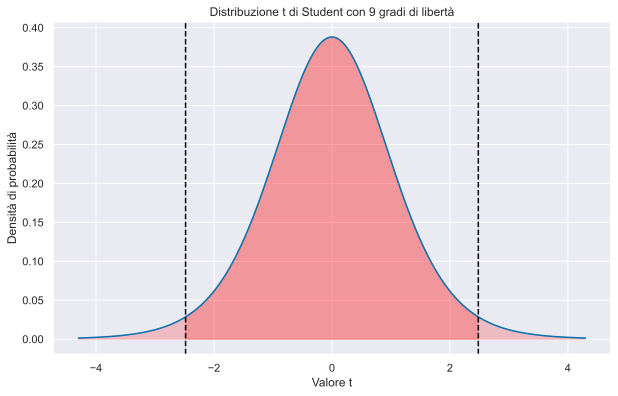

In [8]:
# Set up the x-axis values for the t-distribution plot
x = np.linspace(st.t.ppf(0.001, df), st.t.ppf(0.999, df), 1000)

# Set up the y-axis values for the t-distribution plot
y = st.t.pdf(x, df)

# Create the t-distribution plot
plt.plot(x, y, label='t-distribution')

# Shade the areas [-infinity, -T] and [T, +infinity]
plt.fill_between(x[x <= -T], y[x <= -T], color='red', alpha=0.2)
plt.fill_between(x[x >= T], y[x >= T], color='red', alpha=0.2)

# Add vertical lines for T and -T
plt.axvline(x=T, color='black', linestyle='--')
plt.axvline(x=-T, color='black', linestyle='--')


# Set the plot title and axis labels
plt.title(f"Distribuzione t di Student con {df} gradi di libertà")
plt.xlabel("Valore t")
plt.ylabel("Densità di probabilità")
plt.show()


In [9]:
st.t.cdf(T, df=len(older)-1) * 2

0.03489593108658913

La distriuzione camionaria delle medie di ampiezza $n$ = 10 ha media $\mu_{\bar{X}} = \mu$ e varianza $\sigma^2_{\bar{X}} = \frac{\sigma^2}{n}$, dove $\mu$ è la media della popolazione e $\sigma^2$ è la varianza della popolazione. Il test t di Student presuppone che il campione casuale sia stato estratto da una popolazione normale.

La formula usata dal test t di Student può essere intesa come la standardizzazione della media del campione nella distribuzione campionaria delle medie di ampiezza $n$.

Poiché i parametri della popolazione sono sconosciuti, l'approccio frequentista utilizza la media ipotizzata da $H_0$ al posto della media sconosciuta della popolazione e stima il parametro sconosciuto $\sigma^2$ con la deviazione standard $s$ del campione. 

È stato dimostrato che la statistica 

$$
T = \frac{\bar{Y} - \mathbb{E}(Y)}{s / \sqrt{n}}
$$

segue la distribuzione $t$ di Student con $n-1$ gradi di libertà. 

È importante notare che la statistica $T$ è simile alla statistica $Z$

$$
Z = \frac{\bar{Y} - \mathbb{E}(Y)}{\sigma / \sqrt{n}}
$$

che è la standardizzazione della media campionaria nell'universo delle medie di campioni di ampiezza $n$ quando si conosce il parametro $\sigma$. Tuttavia, la statistica $T$ viene utilizzata quando si stima $\sigma$ utilizzando la deviazione standard del campione $s$.

In [10]:
t_stat, p_val = st.ttest_ind(younger, older)

print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  2.479866520313643
p-value:  0.023260241301116924


## Test $t$ di Student per due gruppi indipendenti

Per eseguire il test t di Student per due gruppi indipendenti, iniziamo usando la funzione `ttest_ind` del modulo `scipy.stats`.

In [11]:
t_stat, p_val = st.ttest_ind(younger, older)

print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  2.479866520313643
p-value:  0.023260241301116924


Replichiamo il risultato precedene utilizzando la formula del test $t$ di Student per due gruppi indipendenti:

$$
\begin{equation}
T = \frac{(\bar{x}_0 - \bar{x}_1) - \mathbb{E}(\bar{x}_0 - \bar{x}_1)}{s_p \sqrt{1/n_0 + 1/n_1}},
\end{equation}
$$

dove $s_p$ è la stima della deviazione standard pooled utilizzata per standardizzare la differenza tra le medie dei due campioni:

$$
\begin{equation}
    s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}.
\end{equation}
$$

Questa formula si può derivare in modo seguente. Nel caso di due campioni indipendenti estratti da due popolazioni con medie $\mu_1$ e $\mu_2$ e con varianza comune $\sigma^2$, la varianza della differenza tra le due medie è data da:

$$
\begin{align}
\mathbb{V}(\bar{X}_1 - \bar{X}_2) &= \mathbb{V}(\bar{X}_1) + \mathbb{V}(\bar{X}_2) \notag\\
&= \frac{\sigma^2}{n1} + \frac{\sigma^2}{n2} \notag\\
&= \sigma^2 \left(\frac{1}{n_1} + \frac{1}{n_2}\right).
\end{align}
$$

Nella prima riga della derivazione precedente, abbiamo usato l'ipotesi di indipendenza dei due campioni. Nel caso di due campioni non indipendenti, la varianza è $\mathbb{V}(\bar{X}_1) + \mathbb{V}(\bar{X}_2) - 2 Cov(\bar{X}_1, \bar{X}_2)$. Dato che i campioni sono indipendenti, $Cov(\bar{X}_1, \bar{X}_2) = 0$. Nella seconda riga, abbiamo utilizzato l'ipotesi che le due popolazioni abbiano la stessa varianza.

Per applicare il risultato ottenuto e ottenere la formula del t di Student per campioni indipendenti, sostituiamo la deviazione standard $\sigma$ al denominatore con la stima della deviazione standard pooled dei due campioni.

Calcoliamo dunque la statistica $T$ di Student per il caso dell'esempio presente. Iniziamo a calcolare la deviazione standard pooled.

In [12]:
s_pool_num = np.sum(
    [
        (len(younger) - 1) * np.std(younger, ddof=1) ** 2,
        (len(older) - 1) * np.std(older, ddof=1) ** 2,
    ]
)
s_pool_denom = len(younger) + len(older) - 2

s_pool = np.sqrt(np.divide(s_pool_num, s_pool_denom))
s_pool


6.672497450147301

Il numeratore della formula del $T$ di Student rappresenta la differenza tra le due medie campionarie osservate, corretta per il valore atteso di tale differenza. L'ipotesi nulla del test t a due campioni ci dice che ci aspettiamo che le medie delle due popolazioni da cui abbiamo estratto i campioni siano uguali, quindi il valore atteso della differenza tra le medie dei due campioni è uguale a zero. Pertanto, il numeratore della formula diventa semplicemente la differenza tra le due medie campionarie:

$$
(\bar{X}_1 - \bar{X}_2) - \mathbb{E}(\bar{X}_1 - \bar{X}_2) = \bar{X}_1 - \bar{X}_2.
$$

Svolgiamo i calcoli con i dati dell'esempio presente.

In [13]:
t_num = np.mean(younger) - np.mean(older)
t_denom = s_pool * np.sqrt(1/len(younger) + 1/len(older))
T = np.divide(t_num, t_denom)
T

2.4798665203136427

La statistica $T$ calcolata sopra si distribuisce con $(n_1 - 1) + (n_2 - 1)$, ovvero $n_1 + n_2 - 2$, gradi di libertà.

In [14]:
df = len(younger) + len(older) - 2
df

18

Il valore-p è uguale all'area sottesa alla funzione t di Student con $n_1 + n_2 - 2$ negli intervalli $[-\infty, -T]$ e $[T, +\infty]$. Nel caso presente abbiamo

In [15]:
(1 - st.t.cdf(T, df=df))*2

0.023260241301116924

Calcoliamo ora l'intervallo di confidenza al livello di fiducia del 95% per la differenza tra le due medie. Iniziamo a calcolare il valore critico $t$.

In [16]:
alpha = 0.05
df = 18
t_quantile = st.t.ppf(1 - alpha/2, df)
t_quantile

2.10092204024096

Troviamo l'errore standard della differenza tra le due medie.

In [17]:
se_diff = s_pool * np.sqrt(1/len(younger) + 1/len(older))
se_diff

2.984031575644676

Troviamo i limiti inferiore e superiore dell'intervallo di confidenza al 95%.

In [18]:
ci_lower = (np.mean(younger) - np.mean(older)) - (t_quantile * se_diff)
ci_upper = (np.mean(younger) - np.mean(older)) + (t_quantile * se_diff)
print("L'intervallo di confidenza al 95% per la differenza tra le due medie è: ({:.2f}, {:.2f})".format(ci_lower, ci_upper))

L'intervallo di confidenza al 95% per la differenza tra le due medie è: (1.13, 13.67)


Svolgiamo ora lo stesso esercizio usando l'inferenza Bayesiana.  Utilizziamo delle distribuzioni a priori sufficientemente larghe così da trovare un risulato simile a quello dell'approccio frequentista.

Inseriamo i dati in un DataFrame.

In [19]:
y = np.concatenate((younger, older))
x = np.concatenate((np.repeat(1, len(younger)), np.repeat(0, len(older))))
df = pd.DataFrame(
    {
        "y": y,
        "x": x
    }
)
df.head()

,y,x
0,45,1
1,38,1
2,52,1
3,48,1
4,25,1


In [20]:
df.tail()

,y,x
15,40,0
16,42,0
17,43,0
18,32,0
19,36,0


Creaimo il modello statistico corrispondente ad un modello di regressione con un predittore dicotomico codificato con 0 per il primo gruppo e con 1 per il secondo gruppo. Eseguiamo il campionamento MCMC.

In [21]:
with Model() as model:
    
    # Priors
    alpha = Normal("alpha", mu=0, sigma=200)
    beta = Normal("beta", mu=0, sigma=100)
    sigma = pm.HalfNormal("sigma", sigma=100)
    
    # Expected value of outcome
    mu = alpha + beta * x
    
    # Likelihood of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=y)
    
    # Sampling
    idata = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 50 seconds.


Esaminiamo le distribuzioni a posteriori dei parametri.

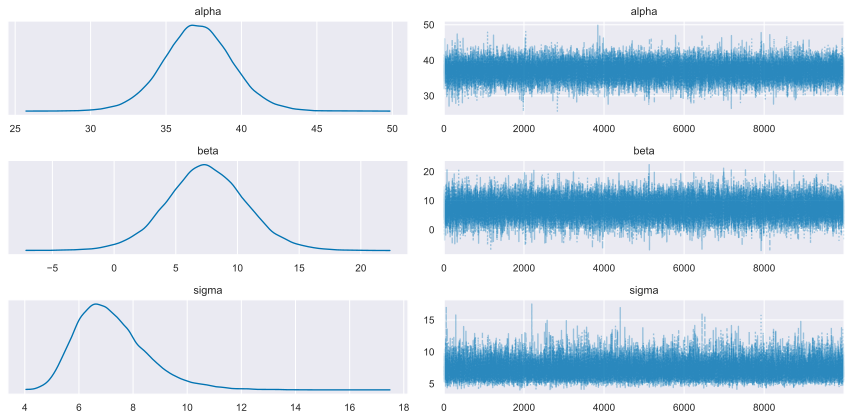

In [22]:
_ = az.plot_trace(idata, combined=True)
plt.tight_layout()

Troviamo l'intervallo di credibilità al 95% per la differenza tra le due medie.

In [23]:
np.mean(older) - np.mean(younger)

-7.399999999999999

In [24]:
az.summary(idata, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,37.080,2.328,32.485,41.705,0.017,0.012,18883.0,20930.0,1.0
beta,7.429,3.279,0.985,13.998,0.024,0.017,19500.0,21597.0,1.0
sigma,7.200,1.331,4.958,9.921,0.009,0.007,20517.0,21329.0,1.0


Se si utilizzano distribuzioni a priori molto ampie, i risultati del modello bayesiano tendono ad essere simili a quelli ottenuti con l'approccio frequentista. Al contrario, l'utilizzo di distribuzioni a priori più restrittive rende il modello bayesiano leggermente più conservativo rispetto all'approccio frequentista. Questo è comprensibile, considerando che il campione dati è molto limitato.

In [25]:
with Model() as model:
    
    # Priors
    alpha = Normal("alpha", mu=0, sigma=100)
    beta = Normal("beta", mu=0, sigma=20)
    sigma = pm.HalfNormal("sigma", sigma=20)
    
    # Expected value of outcome
    mu = alpha + beta * x
    
    # Likelihood of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=y)
    
    # Sampling
    idata = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 43 seconds.


In [26]:
az.summary(idata, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,37.167,2.296,32.640,41.686,0.016,0.011,20282.0,22234.0,1.0
beta,7.265,3.239,0.881,13.763,0.023,0.016,20288.0,21596.0,1.0
sigma,7.154,1.307,4.903,9.786,0.009,0.007,20329.0,19361.0,1.0


## Watermark

In [39]:
%load_ext watermark
%watermark -n -u -v -iv 

Last updated: Sat May 06 2023

Python implementation: CPython
Python version       : 3.11.3
IPython version      : 8.13.2

scipy      : 1.10.1
seaborn    : 0.12.2
matplotlib : 3.7.1
arviz      : 0.15.1
numpy      : 1.23.5
statsmodels: 0.14.0
xarray     : 2023.4.2
pandas     : 1.5.3

